In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/dm-assignment2/titanic-train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#TODO Tasks
# fill missing data for age, cabin
# do categorical encoding, ohe or label
# check for outliers (OPTIONAL)
# check for correlation wit survived
# check for important columns and remove redundant columns


0.42
80.0
29.69911764705882
28.0
0.38910778230082704
<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB
None


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

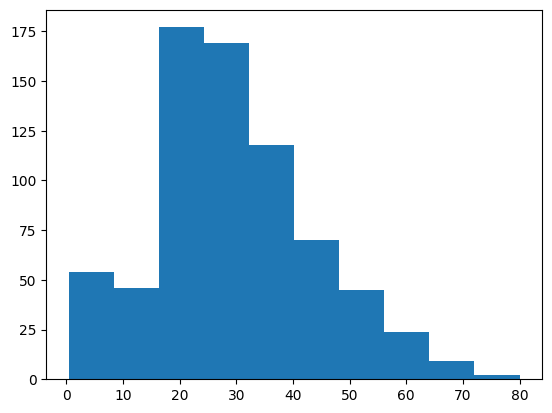

In [5]:
# age missing value
print(df['Age'].min())
print(df['Age'].max())
print(df['Age'].mean())
print(df['Age'].median())
print(df['Age'].skew())
print(df['Age'].info())

plt.hist(df['Age'])


In [6]:
# since graph is a bit skewed , doing median imputation for age
df['Age'] = df['Age'].fillna(df['Age'].median())

In [7]:
# doing mode imputation for embarked
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [ ]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [8]:
# Label encoding for sex column
df['Sex'] = df['Sex'].map({'male':0,'female':1})

In [ ]:
df['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [9]:
## ohe for embarked column
df = pd.get_dummies(df,columns=['Embarked'], drop_first=True)

In [10]:
# removing columns passengerId (no relation with survived) and Cabin
df = df.drop(['PassengerId','Cabin'],axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    int64  
 4   Age         891 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Ticket      891 non-null    object 
 8   Fare        891 non-null    float64
 9   Embarked_Q  891 non-null    bool   
 10  Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(2)
memory usage: 64.5+ KB


In [12]:
# excluding name and ticket ; testing with tempDF for feature engineering
temp_df =  df.drop(['Name','Ticket'],axis=1)

In [13]:
temp_df.corr()['Survived']

,Survived
Survived,1.000000
Pclass,-0.338481
Sex,0.543351
Age,-0.064910
SibSp,-0.035322
Parch,0.081629
Fare,0.257307
Embarked_Q,0.003650
Embarked_S,-0.149683


In [14]:
temp_df['family_size'] = df['SibSp'] + df['Parch']
temp_df.corr()['Survived']

,Survived
Survived,1.000000
Pclass,-0.338481
Sex,0.543351
Age,-0.064910
SibSp,-0.035322
Parch,0.081629
Fare,0.257307
Embarked_Q,0.003650
Embarked_S,-0.149683
family_size,0.016639


In [15]:
temp_df['Is_alone'] = np.where(temp_df['family_size']==0,1,0)
temp_df.corr()['Survived']

,Survived
Survived,1.000000
Pclass,-0.338481
Sex,0.543351
Age,-0.064910
SibSp,-0.035322
Parch,0.081629
Fare,0.257307
Embarked_Q,0.003650
Embarked_S,-0.149683
family_size,0.016639


In [16]:
df['family_size'] = df['SibSp'] + df['Parch']


In [17]:
df['Is_alone'] = np.where(df['family_size']==0,1,0)
df.drop(['SibSp','Parch'],axis=1,inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   Ticket       891 non-null    object 
 6   Fare         891 non-null    float64
 7   Embarked_Q   891 non-null    bool   
 8   Embarked_S   891 non-null    bool   
 9   family_size  891 non-null    int64  
 10  Is_alone     891 non-null    int64  
dtypes: bool(2), float64(2), int64(5), object(2)
memory usage: 64.5+ KB


In [19]:
## dropping ticket column
df = df.drop('Ticket',axis=1)

In [22]:
# ignoring name
df2 = df.drop(columns=['Name'])

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked_Q   891 non-null    bool   
 6   Embarked_S   891 non-null    bool   
 7   family_size  891 non-null    int64  
 8   Is_alone     891 non-null    int64  
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB


In [24]:
X = df2.drop('Survived',axis=1)
y = df2['Survived']

In [25]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier



In [26]:
## task2) using gridSearch CV for predicting the best parameters for decision tree

dt2 = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None,5,10,15,20],
    'min_samples_split': [2,5,10],
    'min_samples_leaf' : [1,2,4],
    'criterion' : ['gini', 'entropy']
}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(dt2, param_grid, cv=5)
grid_search.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [27]:
best_decision_tree = grid_search.best_estimator_

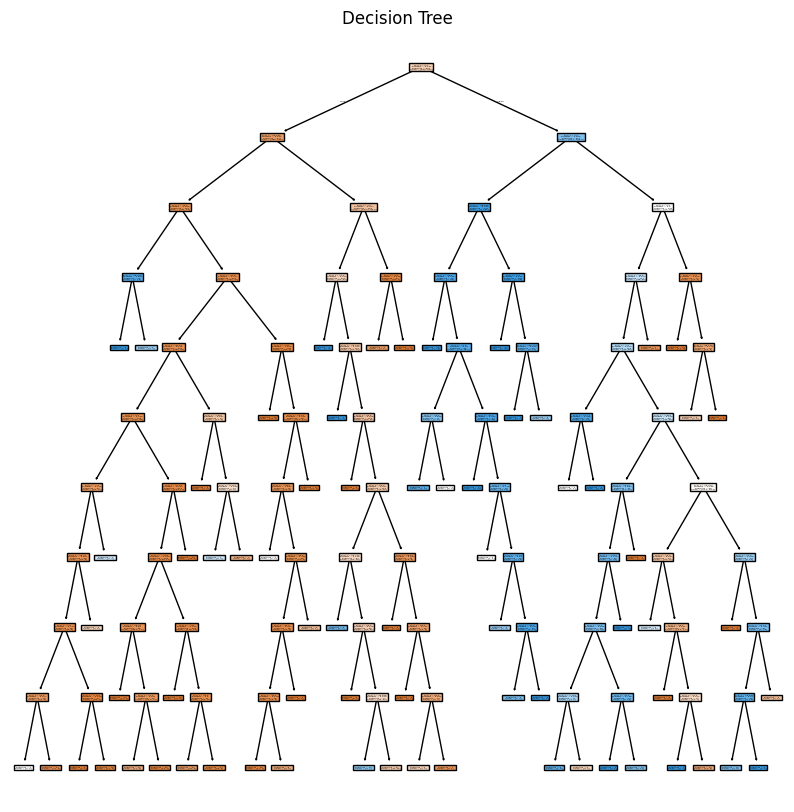

In [28]:
plt.figure(figsize=(10,10))
plot_tree(best_decision_tree,filled=True)
plt.title('Decision Tree')
plt.show()

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
## task3 )

cv_score = cross_val_score(best_decision_tree,X,y,cv=5, scoring='accuracy')

avg = cv_score.mean()
avg

0.8249325214989642

In [31]:
## task 4) predicting best hyperparameters for randomForest

rf_test = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None,5,10,15,20],
    'min_samples_split': [2,5,10],
    'min_samples_leaf' : [1,2,4],
}

grid_search_rf = GridSearchCV(rf_test, param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X,y)



/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy')

In [32]:
best_random_forest = grid_search_rf.best_estimator_

In [33]:
## cv on random forest

cv_score_rf = cross_val_score(best_random_forest,X,y,cv=5, scoring='accuracy')

avg_rf = cv_score_rf.mean()
avg_rf

0.8283221392254095

In [ ]:
# TASK 5) ans))
## Random Forest is slightly better than Decision Tree since in Random Forest we combine multiple decision tree and calculate accuracy based on group
## average of all the trees, here in Random trees we also have much more diversity whereas in decision trees although faster only takes a single
## tree and tries to optimize it the best

